<a href="https://colab.research.google.com/github/uyangas/Visualizations-in-Python/blob/master/Becoming_a_data_scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Becoming a Data Scientist

Data Science (DS) is a fresh field in the country that I live in, Mongolia, and it is true for most of the developing countries. These countries share similar characteristics such as very few experts in this field, very few, almost non existent degree or courses offered by the universities on the topic and not many contents are made available in the native language, which are the main challenges that the people who want to pursue data science face.

Those who aspire to become data scientists often ask questions like how to self-study data science, where to start and what career path to take. Nowadays, with overload of information and awesome examples others' work with data, we can easily become overwhelmed, distracted and get confused about what career path to take or what skillset to hone because everything looks attractive in Artificial Intelligence (AI) and Data science.

Therefore, I decided to approach this survey analysis from an angle that can assist people to create and plan their learning path about AI and DS and hopefully help people to plan and choose their career paths.

In [1]:
# upgrade kaggle api
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=36c28fa33fffde313be2815878b0476aaf2aa7f37fbd7f8072d7a964434adfb0
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9


In [2]:
from google.colab import files

In [ ]:
# upload kaggle api token json
files.upload()

In [10]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
# save kaggle.json to "kaggle" directory
! cp kaggle.json ~/.kaggle/

In [12]:
# change the permission of the file
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
# download the competition dataset
! kaggle competitions download -c kaggle-survey-2020 --force

  0% 0.00/2.08M [00:00<?, ?B/s]
100% 2.08M/2.08M [00:00<00:00, 95.6MB/s]


In [14]:
# create directory to unzip the data
! mkdir ~/.kaggle_survey_2020

In [15]:
! unzip kaggle-survey-2020.zip -d kaggle_survey_2020

Archive:  kaggle-survey-2020.zip
  inflating: kaggle_survey_2020/kaggle_survey_2020_responses.csv  
  inflating: kaggle_survey_2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf  
  inflating: kaggle_survey_2020/supplementary_data/kaggle_survey_2020_methodology.pdf  


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from shapely import geometry
from datetime import datetime
from ipywidgets import interactive
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
import plotly.express as px
import random


warnings.filterwarnings('ignore')
plt.style.use("ggplot")

In [17]:
survey = pd.read_csv('kaggle_survey_2020/kaggle_survey_2020_responses.csv').iloc[1:,:]
survey.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
survey['Q15'] = survey['Q15'].fillna(0)

Q15_dict = {'1-2 years':'3. 1-2 years', 
 'I do not use machine learning methods':'1. No ML', 
 '3-4 years':"5. 3-4 years",
  0:"No Answer", 
 'Under 1 year':'2. <1 year', 
 '2-3 years':"4. 2-3 years", 
 '4-5 years':"6. 4-5 years", 
 '5-10 years':"7. 5-10 years",
 '20 or more years':"9: 20+ years", 
 '10-20 years':"8. 10-20 years"}

survey['Q15'] = [Q15_dict[k] for k in survey['Q15']]

survey['Q6'] = survey['Q6'].fillna(0)

Q6_dict = {'5-10 years': '5. 5-10 years', 
           '10-20 years': '6. 10-20 years', 
           '3-5 years': '4. 3-5 years', 
           '< 1 years': '2. <1 years', 
           '1-2 years': '3. 1-2 years',
           '20+ years': '7. 20+ years', 
           'I have never written code':'1. No Coding', 
           0: '8. No Answer'}

survey['Q6'] = [Q6_dict[k] for k in survey['Q6']]

Q15_cnt = survey[['Q15','Q3']].groupby('Q15').count()
Q6_cnt = survey[['Q6','Q3']].groupby('Q6').count()
Q6_Q15_cnt = survey[['Q15','Q6','Q3']].groupby(['Q6', 'Q15']).count().reset_index().pivot('Q6', 'Q15', 'Q3').fillna(0)

## Coding and Machine learning experience (Q15, Q6)

People often think that they need to have prior coding experience to specialize in machine learning. It's true that coding is required for machine learning but let's see that whether you can acquire coding and machine learning skills simultaneously. 

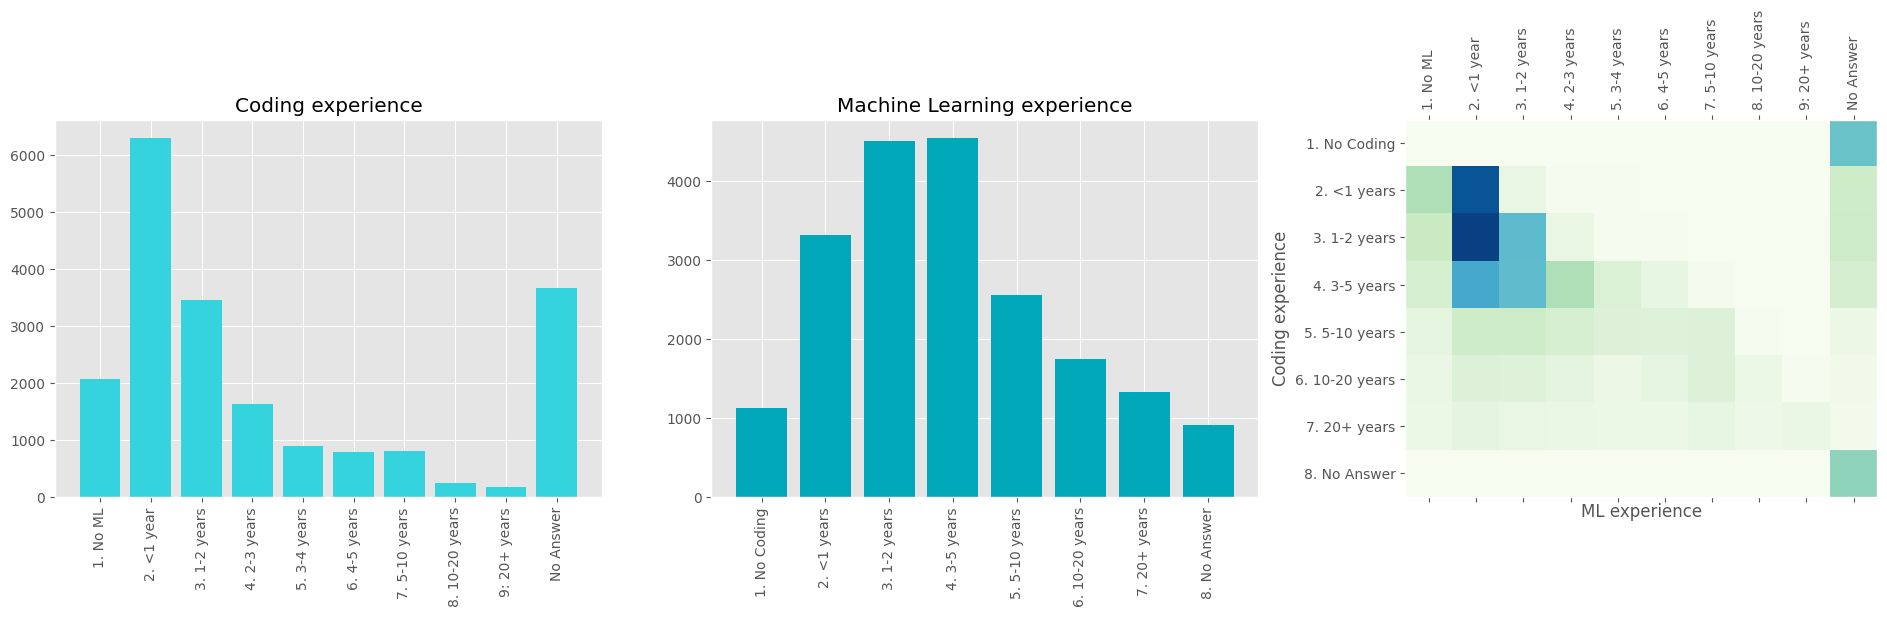

In [19]:
fig, ax = plt.subplots(1, 3, figsize=[24,5], dpi=100)

ax[0].bar(Q15_cnt.index, Q15_cnt.Q3, color='#35D3DE')
ax[0].tick_params('x', rotation=90)
ax[0].title.set_text("Coding experience")

ax[1].bar(Q6_cnt.index, Q6_cnt.Q3, color='#00A8BA')
ax[1].tick_params('x', rotation=90)
ax[1].title.set_text("Machine Learning experience")

ax[2].matshow(Q6_Q15_cnt, cmap='GnBu')
ax[2].set_xticks(np.arange(len(Q6_Q15_cnt.columns)))
ax[2].set_yticks(np.arange(len(Q6_Q15_cnt.index)))
ax[2].set_xticklabels(Q6_Q15_cnt.columns, rotation=90)
ax[2].set_yticklabels(Q6_Q15_cnt.index)
ax[2].set_ylabel("Coding experience")
ax[2].set_xlabel("ML experience")
ax[2].grid(False)

plt.show()

Most people who participated in this survey have less than 3 years of coding experience. As for Machine learning experience, most people have less than 5 years of experience. Based on the heatmap above, it's interesting to see that the people who have less than 2 year of coding experience have less than 2 years of ML experience. This suggests that large number of people dive straight into ML and coding without any coding experience. This doesn't necessarily mean that people don't need prior coding experience. Experienced coder will have relatively easy time to transition to become data scientist or other related field because some skills that they acquired as a coder are transferable.

### Now let's dive little bit more detail into coding and machine learning experiences of each job position.

## Coding and Machine Learning experience of each position (Q15, Q5, Q6)

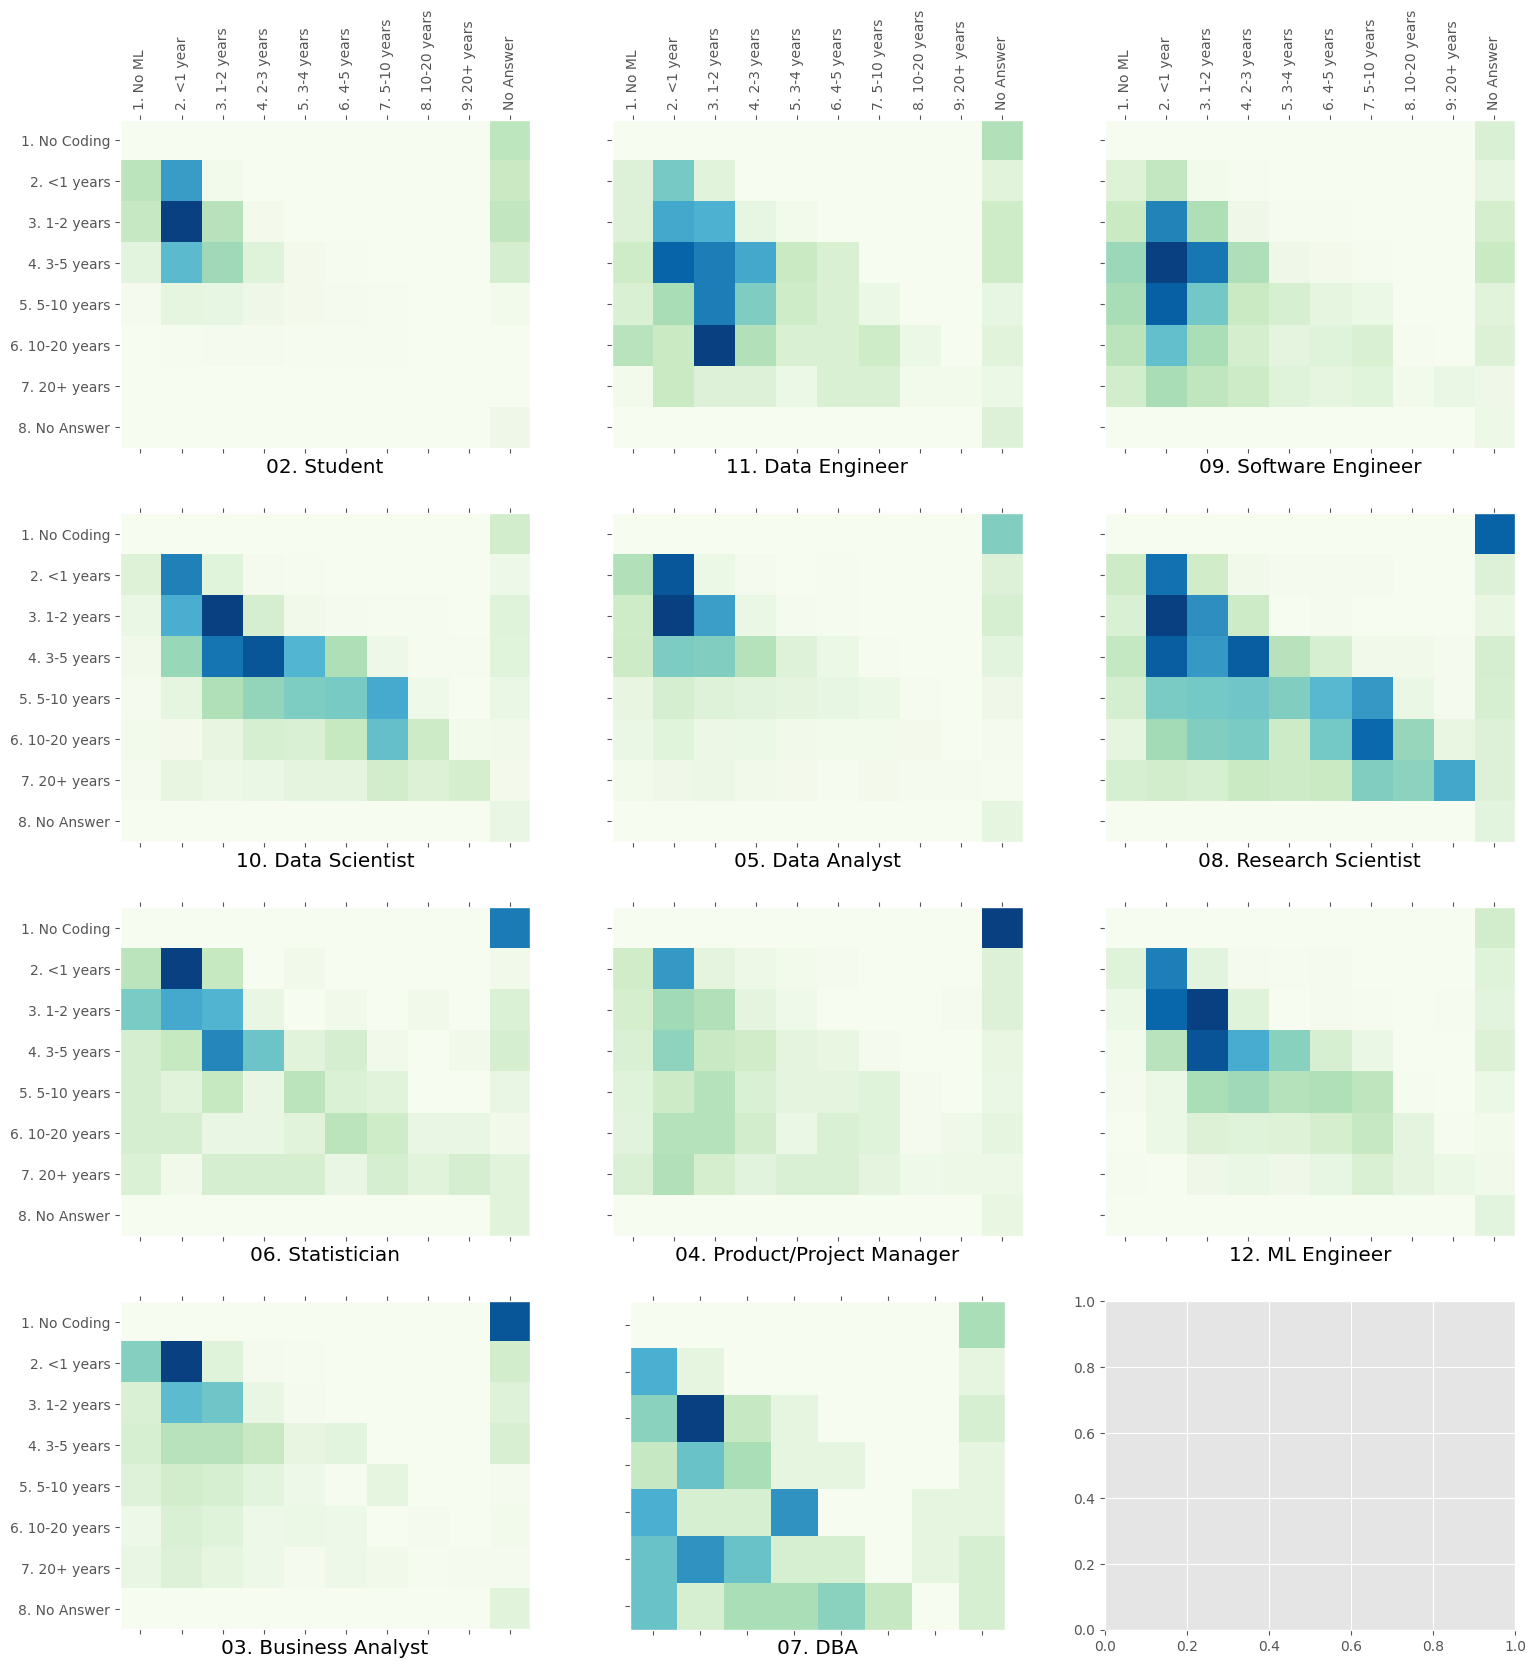

In [ ]:
survey['Q5'] = survey['Q5'].fillna("Unknown")

Q5_dict = {'Student': '02. Student', 
           'Data Engineer':"11. Data Engineer", 
           'Software Engineer':"09. Software Engineer", 
           'Data Scientist':"10. Data Scientist",
           'Data Analyst': '05. Data Analyst', 
           'Research Scientist': "08. Research Scientist", 
           'Other':"13. Other",
           'Currently not employed': '01. Not employed', 
           'Statistician': "06. Statistician",
           'Product/Project Manager': "04. Product/Project Manager", 
           'Machine Learning Engineer':"12. ML Engineer", 
           'Unknown':"14. Unknown",
           'Business Analyst': "03. Business Analyst", 
           'DBA/Database Engineer':"07. DBA"}

survey['Q5'] = [Q5_dict[k] for k in survey['Q5']]

Q5_Q6_Q15 = survey[['Q5', 'Q15', 'Q6','Q3']].dropna()

cur_roles = np.delete(Q5_Q6_Q15.Q5.unique(), [6, 7, 11])

fig, ax = plt.subplots(4,3, figsize=(18,20), dpi=100)

axis = [(j, i) for j in range(4) for i in range(3)]

for a, i in zip(axis, cur_roles):
    data = Q5_Q6_Q15[Q5_Q6_Q15.Q5 == i].groupby(['Q15','Q6']).count().reset_index().pivot('Q6','Q15','Q3').fillna(0).astype('int')
    
    ax[a[0]][a[1]].matshow(data, cmap='GnBu')
    ax[a[0]][a[1]].set_xticks(np.arange(len(data.columns)))
    ax[a[0]][a[1]].set_yticks(np.arange(len(data.index)))
    ax[a[0]][a[1]].grid(False)
    ax[a[0]][a[1]].set_title(i, y=-0.1)
        
    if a in [(0,0)]:
        ax[a[0]][a[1]].set_xticklabels(data.columns, rotation=90)
        ax[a[0]][a[1]].set_yticklabels(data.index)

    elif a in [(0,1), (0,2)]:
        ax[a[0]][a[1]].set_xticklabels(data.columns, rotation=90)
        ax[a[0]][a[1]].set_yticklabels([])
        
    elif a in [(1,0), (2,0), (3,0)]:
        ax[a[0]][a[1]].set_xticklabels([])
        ax[a[0]][a[1]].set_yticklabels(data.index)
    
    else:
        ax[a[0]][a[1]].set_xticklabels([])
        ax[a[0]][a[1]].set_yticklabels([])
        

plt.show()

- `Students` have less coding experience in general, but their ML experience doesn't have much time lag to general coding experience which suggests that they learn coding and ML methods almost at the same time.
- `Data Engineers` and `Software Engineers` have more coding experience and less ML experience which makes perfect sense because both positions are code heavy and it's possible that with the current rapidly growing trend of data, their daily tasks started to include data related tasks and require them to transition to machine learning.
- `Data Scientist`, `Machine Learning Engineer` and `Research Scientist` have almost proportional coding and ML experiences which suggest that they also learned machine learning method and coding simultaneously.
- `Data Analyst`,`Statistician` and `Business Analyst` tend to have less coding and ML experiences.
- `Product/Project Managers` have less than 3 years of ML experience
- `DBA/Database Engineer`, the most of them have less than 1 or no machine learning experience. Their coding and ML experience proportion is very random.

Based on the outcome, it looks like someone who is aspiring to become one of `Data Analyst`, `Statistician`, `Business Analyst`, `Data Scientist`, `Machine Learning Engineer` and `Research Scientist` doesn't necessarily need to have prior coding experience before started learning machine learning and data science. People who work in these positions started learning machine learning and coding almost at the same time, in other words, coding can be acquired by studying machine learning concepts and vice versa.

### Then, let's see which and how many programming languages to acquire in order to comfortably work on data?

## Each position's daily used programming languages. How many do you need to know? (Q8, Q7)

In [ ]:
recom = ['Q5']

for q in ['Q7','Q8']:
    cols = survey.columns[survey.columns.str.find(q,0) == 0]
    recom += list(cols)
survey_lan = survey[recom]
survey_lan.rename(columns={'Q7_Part_1':'Python', 
                       'Q7_Part_2':'R', 
                       'Q7_Part_3':'SQL', 
                       'Q7_Part_4':'C', 
                       'Q7_Part_5':'C++', 
                       'Q7_Part_6':'Java', 
                       'Q7_Part_7':'Javascript', 
                       'Q7_Part_8':'Julia', 
                       'Q7_Part_9':'Swift', 
                       'Q7_Part_10':'Bash', 
                       'Q7_Part_11':'MATLAB', 
                       'Q7_Part_12':'None', 
                       'Q7_OTHER':'Other'}, inplace=True)

survey_lan.drop(['None','Other'],inplace=True, axis=1)

sank = survey_lan.groupby(['Q5','Q8']).count().reset_index()
sank = sank[(sank.Q8 !='None') &(sank.Q8 != 'Other')]

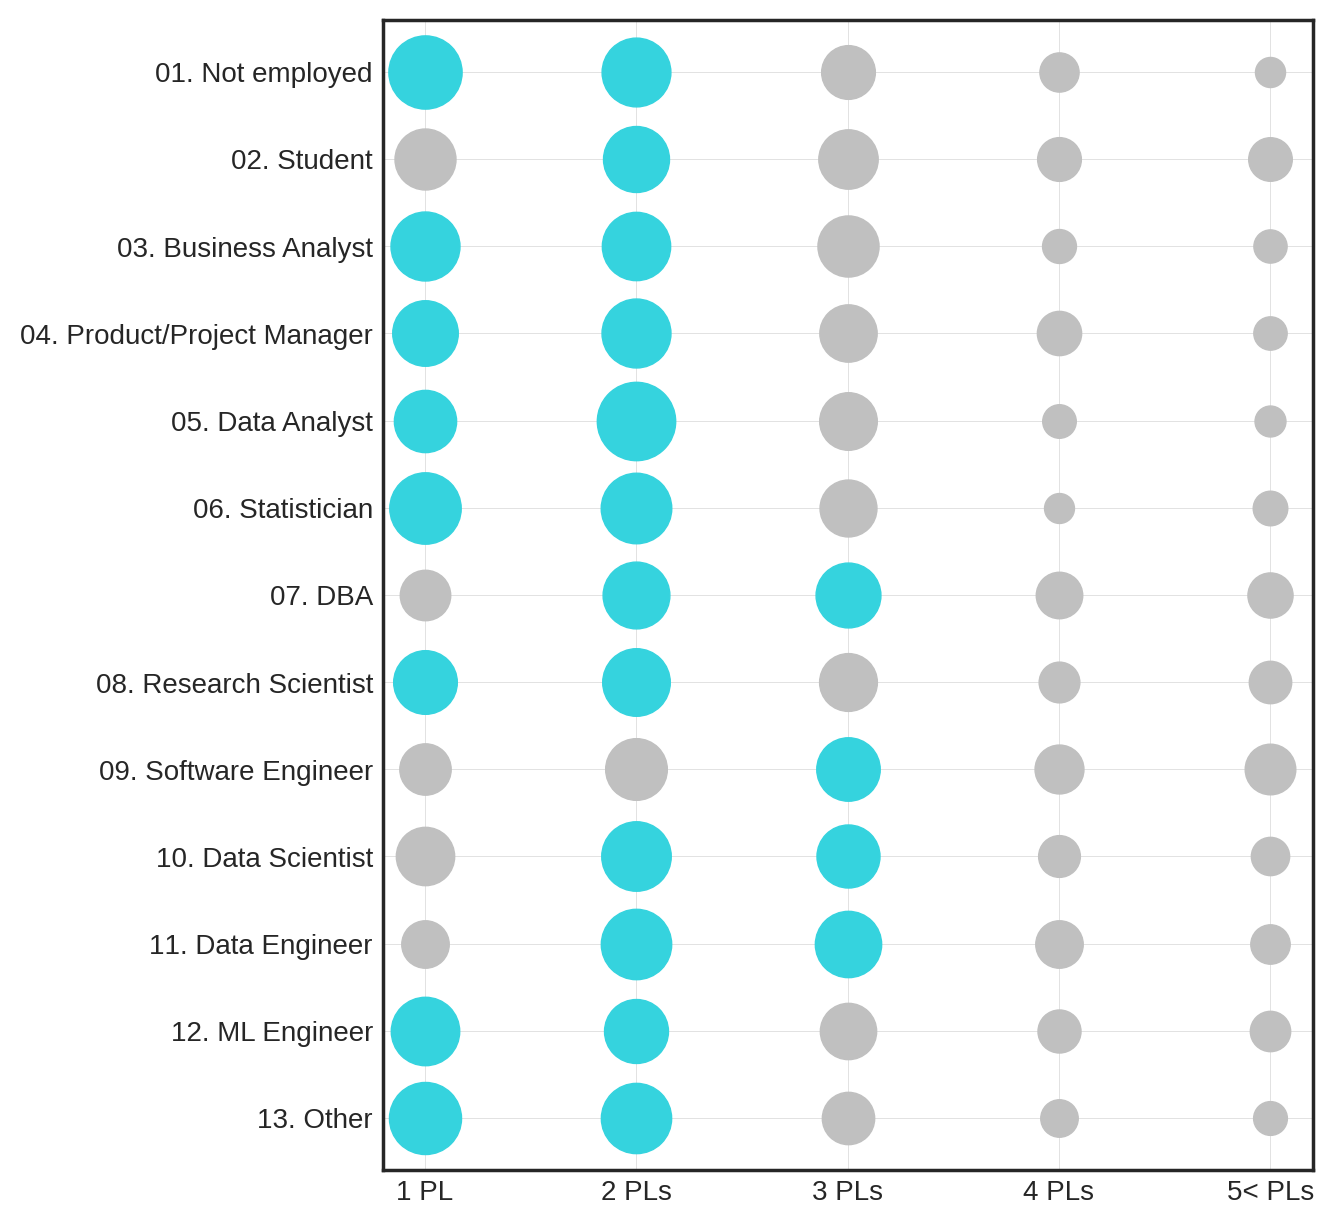

In [ ]:
lan_num = survey_lan.drop('Q8', axis=1)\
.set_index('Q5')\
.count(axis=1)\
.reset_index()\
.rename(columns={0:"#prog"})\
.dropna()

cut_bins = [0, 1, 2, 3, 4, 11]
bin_label = ["1 PL", "2 PLs", "3 PLs", "4 PLs","5< PLs"]
lan_num['prog_interval'] = pd.cut(lan_num['#prog'], bins=cut_bins, labels=bin_label)

lan_num = lan_num.groupby(['Q5', 'prog_interval']).count().reset_index().pivot('Q5','prog_interval', '#prog').dropna()

def perc(x):
    return (x*2000/sum(x)).astype('int')

for row in range(lan_num.shape[0]):
    lan_num.iloc[row,:] = perc(lan_num.iloc[row,:])
    
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(6, 13), dpi=200)

gs = fig.add_gridspec(5, 4)

ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for cur in lan_num.index[::-1]:
    for bl in bin_label:
        val = lan_num.loc[cur, bl]
        if val > 500:
            ax_plot.scatter(bl, cur, s=val, color='#35D3DE')
        else:
            ax_plot.scatter(bl, cur, s=val, color='#C0C0C0')
        
ax_plot.grid(linewidth=0.2, zorder=0)

On average, the most data related jobs require 2 programming language knowledge. The most of data engineers, data scientists, DBAs and software engineers know 3 programming languages on average. It looks like knowing at least 2 languages is a minimun requirement for data related profession. 

### Let's look at which languages are recommended by people to begin learning.

## Daily used programming languages and recommended languages of each position (Q8, Q26, Q29, Q31, Q33, Q34, Q35)

In [ ]:
current_role = ['02. Student', "03. Business Analyst", "04. Product/Project Manager",'05. Data Analyst', "06. Statistician","07. DBA","08. Research Scientist", "09. Software Engineer", "10. Data Scientist","11. Data Engineer", "12. ML Engineer"]
fig = make_subplots(
    rows=3, cols=4,
    specs=[[{"type": "sankey"}, {"type": "sankey"},{"type": "sankey"}, {"type": "sankey"}], 
       [{"type": "sankey"},{"type": "sankey"}, {"type": "sankey"}, {"type": "sankey"}],
       [{"type": "sankey"}, {"type": "sankey"}, {"type": "sankey"}, {"type": "sankey"}]
      ],
    subplot_titles=(current_role),
)

axis = [(j, i) for j in range(1,4) for i in range(1,5)]

for ax, role in zip(axis,range(len(current_role))):

    sank_ba = sank[sank.Q5 == current_role[role]].drop('Q5',axis=1).set_index('Q8')

    source = []
    target = []
    value = []
    color_link = []

    color= ["rgba(31, 119, 180, 0.4)",
            "rgba(255, 127, 14, 0.4)",
            "rgba(44, 160, 44, 0.4)",
            "rgba(214, 39, 40, 0.4)",
            "rgba(148, 103, 189, 0.4)",
            "rgba(140, 86, 75, 0.4)",
            "rgba(227, 119, 194, 0.4)",
            "rgba(127, 127, 127, 0.4)",
            "rgba(188, 189, 34, 0.4)",
            "rgba(23, 190, 207, 0.4)",
            "rgba(31, 119, 180, 0.4)"]

    for row in sank_ba.iterrows():
        ind_t = row[0]
        row_values = row[1]
        ind_s = row_values.index

        for c in range(len(row_values)):
            if row_values[c] > 0:
                source.append(ind_s[c])
                value.append(row_values[c])
                target.append(ind_t)
                color_link.append(color[c])

    source_dict = {'Python':0, 'R':1, 'SQL':2, 'C':3, 'C++':4, 'Java':5, 'Javascript':6, 'Julia':7, 'Swift':8, 'Bash':9, 'MATLAB':10}

    target_dict = {'Python':11, 'R':12, 'SQL':13, 'C':14, 'C++':15, 'Java':16, 'Javascript':17, 'Julia':18, 'Swift':19, 'Bash':20, 'MATLAB':21}

    color= ["rgba(31, 119, 180, 0.8)",
            "rgba(255, 127, 14, 0.8)",
            "rgba(44, 160, 44, 0.8)",
            "rgba(214, 39, 40, 0.8)",
            "rgba(148, 103, 189, 0.8)",
            "rgba(140, 86, 75, 0.8)",
            "rgba(227, 119, 194, 0.8)",
            "rgba(127, 127, 127, 0.8)",
            "rgba(188, 189, 34, 0.8)",
            "rgba(23, 190, 207, 0.8)",
            "rgba(31, 119, 180, 0.8)"]

    source = [source_dict[k] for k in source]
    target = [target_dict[k] for k in target]
    color_node = color*2
    labels = list(source_dict.keys())*2

    link = dict(source = source,
                target = target,
                value = value,
                label = labels,
                color = color_link
               )

    node = dict(pad = 15,
                thickness = 20,
                line = dict(color = "black", width = 0.5),
                label = labels,
                color = color_node)

    data = go.Sankey(link=link,
                  node=node)

    fig.add_trace(data, row=ax[0], col=ax[1])
        
fig.update_layout(width=1200, height=1000)
    
fig.show()


Based on the chart of daily used programming languages and recommended languages plots, `Python` is the most recommended language to learn which is followed by `SQL` and `R`. Especially for data analysis related position such as `Data Analyst` and `Data Scientist`, these 3 languages are must, and for more technical position such as `DBA`, `Data Engineer` and `ML Engineer`, `Python` and `SQL` are must to learn.

### Now, let's look at what type of concepts and methods that someone should know.

## Number of AI areas to have knowledge about (Q8, Q17, Q18, Q19)

In [ ]:
prospect = ['Q5']

for q in np.arange(17, 20):
    cols = survey.columns[survey.columns.str.find("Q" + str(q)) == 0]
    for col in cols:
        prospect.append(col)

survey_concept = survey.loc[:,prospect]
survey_concept['ML'] = survey_concept[['Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5']].count(axis=1)
survey_concept['DL'] = survey_concept[['Q17_Part_6','Q17_Part_7','Q17_Part_8','Q17_Part_9','Q17_Part_10']].count(axis=1)
survey_concept['CV'] = survey_concept[['Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5']].count(axis=1)
survey_concept['NLP'] = survey_concept[['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4']].count(axis=1)
survey_concept['CV_other'] = survey_concept[['Q18_OTHER']].count(axis=1)
survey_concept['ML_other'] = survey_concept[['Q17_OTHER']].count(axis=1)
survey_concept['NLP_other'] = survey_concept[['Q19_OTHER']].count(axis=1)
survey_concept['all'] = survey_concept[['ML','DL','CV','NLP','CV_other','ML_other','NLP_other']].sum(axis=1)
survey_concept = survey_concept[survey_concept['all']!=0]

current_role = ['02. Student', "03. Business Analyst", "04. Product/Project Manager",'05. Data Analyst', "06. Statistician","07. DBA","08. Research Scientist", "09. Software Engineer", "10. Data Scientist","11. Data Engineer", "12. ML Engineer"]

df = pd.DataFrame()
random.seed(123)

survey_cs = survey_concept[['Q5','ML','DL','CV','NLP']]

km = KMeans(n_clusters = 5)
km.fit(survey_cs.drop('Q5',axis=1))
survey_cs['clusters'] = km.labels_
df = pd.concat([df, 
                pd.concat([survey_cs.groupby(['clusters']).mean().astype('int'), 
                           survey_cs.groupby(['clusters']).agg({'ML':'count'}).rename(columns={'ML':'cnt'})], axis=1)],
               axis=0)

In [ ]:
current_role = [1,2,3,4,5]
x = list(df.columns[:4])
fig = make_subplots(
    rows=5, cols=2,
    specs=[[{}, {"rowspan":5}],
           [{}, None],
           [{}, None],
           [{}, None],
           [{}, None]],
    subplot_titles=("Group 1","Number of people in each group", "Group 2", "Group 3", "Group 4", "Group 5")
)

fig.add_trace(go.Bar(x=x, y=np.array(df.iloc[0,:4])),
                 row=1, col=1)

fig.add_trace(go.Bar(x=x, y=np.array(df.iloc[1,:4])),
                 row=2, col=1)

fig.add_trace(go.Bar(x=x, y=np.array(df.iloc[2,:4])),
                 row=3, col=1)

fig.add_trace(go.Bar(x=x, y=np.array(df.iloc[3,:4])),
                 row=4, col=1)

fig.add_trace(go.Bar(x=x, y=np.array(df.iloc[4,:4])),
                 row=5, col=1)

x = ['Group 1', 'Group 2','Group 3','Group 4','Group 5']

fig.add_trace(go.Bar(x=x, y=np.array(df.iloc[:,4])),
                 row=1, col=2)

fig.update_layout(showlegend=False, width=800, height=700, font_size=10)
#fig.update_yaxes(showticklabels=False)

fig['layout']['yaxis1'].update(title="Level of concepts",title_font_size=8, range=[0, 3], autorange=False, tick0=0, dtick=1)
fig['layout']['yaxis2'].update(title='',title_font_size=8, autorange=True, showticklabels=True)
fig['layout']['yaxis3'].update(title="Level of concepts",title_font_size=8, range=[0, 3], autorange=False, tick0=0, dtick=1)
fig['layout']['yaxis4'].update(title="Level of concepts",title_font_size=8, range=[0, 3], autorange=False, tick0=0, dtick=1)
fig['layout']['yaxis5'].update(title="Level of concepts",title_font_size=8, range=[0, 3], autorange=False, tick0=0, dtick=1)
fig['layout']['yaxis6'].update(title="Level of concepts",title_font_size=8, range=[0, 3], autorange=False, tick0=0, dtick=1)



fig.show()

There are many methods and concepts in AI to learn. `Machine Learning (ML)`, `Deep Learning (DL)`, `Computer Vision (CV)` and `Natural Language Processing (NLP)` are sub sections of AI that some people specialize in. Not everyone is required to know all the concepts in those fields to work on data. The number of people who know only machine learning concepts is higher than the number of people who know the concepts of more than 2 sub sections. This means that if someone knows the concepts of `Machine learning` to certain extent, he/she will be able to work on data and find data related jobs. This doesn't necessarily mean that by only knowing machine learning concepts, you can handle all data related problems. Therefore, it's recommended to learn concepts other than machine learning such as deep learning to work on more complex data.

### Now, let's look at what type of algorithms and methods to learn in each sub section of AI.

## The concepts and algorithms to learn (Q5, Q17, Q18, Q19)

In [ ]:
survey_concept_ml = survey_concept[['Q5','Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5']]\
.groupby('Q5')\
.count()\
.reset_index()\
.rename(columns={'Q17_Part_1':"Linear/Logistic Reg",'Q17_Part_2':"DT, RF",'Q17_Part_3':"Boosting",'Q17_Part_4':"Bayesian",'Q17_Part_5':"Evolutionary Approaches"})\
.melt(id_vars='Q5')\
.rename(columns={'variable':'methods', 'value':'number of people','Q5':'Job position'})

survey_concept_dl = survey_concept[['Q5','Q17_Part_6','Q17_Part_7','Q17_Part_8','Q17_Part_9','Q17_Part_10']]\
.groupby('Q5')\
.count()\
.reset_index()\
.rename(columns={'Q17_Part_6':"DNN",'Q17_Part_7':"CNN",'Q17_Part_8':"GAN",'Q17_Part_9':"RNN",'Q17_Part_10':"Trans. Network"})\
.melt(id_vars='Q5')\
.rename(columns={'variable':'methods', 'value':'number of people','Q5':'Job position'})

survey_concept_cv = survey_concept[['Q5','Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5']]\
.groupby('Q5')\
.count()\
.reset_index()\
.rename(columns={'Q18_Part_1':"Gen. Purpose",'Q18_Part_2':"Img. Segm.",'Q18_Part_3':"Object detection",'Q18_Part_4':"Img. Class.",'Q18_Part_5':"GANs"})\
.melt(id_vars='Q5')\
.rename(columns={'variable':'methods', 'value':'number of people','Q5':'Job position'})

survey_concept_nlp = survey_concept[['Q5','Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4']]\
.groupby('Q5')\
.count()\
.reset_index()\
.rename(columns={'Q19_Part_1':"Word embed",'Q19_Part_2':"Encode/decode",'Q19_Part_3':"Context embed",'Q19_Part_4':"Transformer"})\
.melt(id_vars='Q5')\
.rename(columns={'variable':'methods', 'value':'number of people','Q5':'Job position'})

concept_all = pd.concat([survey_concept_ml,survey_concept_dl,survey_concept_cv,survey_concept_nlp],axis=0)

fig = px.bar(concept_all, x="methods", y="number of people", color="Job position", title="Algorithms and methods to learn")
fig.update_layout(template='simple_white')
fig.show()

(Tap twice on `position` to see popular methods of each job position)

Overall, `Linear/ logistic regression`, `Decision tree/ Random forest`, `Boosting methods` and `Convolutional NN` are essential to learn. Each data related position requires different sets of algorithms and methods.
- `Business Analyst`, `Data Analyst`, `Statistician` and `DBA` positions mostly require knowledge of machine learning algorithms and methods.
- `Research scientists` and `ML Engineer` positions require diverse knowledge in all 4 areas (`ML`, `DL`, `CV`, `NLP`)
- `Product manager`, `Data Scientist`, `Software engineer` and `Data Engineer` positions require knowledge of machine learning and deep learning algorithms and some knowledge in other areas.

If someone is aspiring to work in data field and doesn't have much experience, then following could be a potential career path. (the positions are ranked in terms of required knowledge of algorithms and methods)

`Data Analyst/ Business Analyst/ Statistician` -> `Data Scientist/ Data Engineer` -> `Research Scientist/ ML Engineer`

### Now, let's look at other big data and business intelligence products and tools to be familiar with.

## Additional data tools to learn (Q5, Q26A, Q27A, Q28A, Q29A, Q31A)

In [ ]:
colors = [
'#9fe2bf',
'#FF6347',  
'#32CD32',  
'#d62728',  # brick red
'#ff7f0e',  # safety orange
'#1f77b4',  # muted blue
'#e377c2',  # raspberry yogurt pink
'#17becf',   # blue-teal
'#2ca02c',  # cooked asparagus green
'#FFA500',  
         ]


columns = {'Q26_A_Part_1':'AWS',
           'Q26_A_Part_2':'MS Azure',
           'Q26_A_Part_3':'Google Cloud', 
           'Q26_A_Part_4':'IBM/Redhat',
           'Q26_A_Part_5':'Oracle',
           'Q26_A_Part_6':'SAP Cloud',
           'Q26_A_Part_7':'Salesforce Cloud',
           'Q26_A_Part_8':'VMware Cloud',
           'Q26_A_Part_9':'Alibab Cloud',
           'Q26_A_Part_10':'Tencent Cloud',
           'Q26_A_Part_11':'None',
           'Q26_A_OTHER':'Other',
          'Q27_A_Part_1':'Amazon EC2',
           'Q27_A_Part_2':'AWS Lambda', 
           'Q27_A_Part_3':"Amazon Elastic Container",
           'Q27_A_Part_4':"Azure Cloud Services",
           'Q27_A_Part_5':"MS Azure Container",
           'Q27_A_Part_6':"Azure functions",
           'Q27_A_Part_7':"Google Cloud engine",
           'Q27_A_Part_8':"Google Cloud functions",
           'Q27_A_Part_9':"Google Cloud run",
           'Q27_A_Part_10':"Google Cloud app engine",
           'Q27_A_Part_11':"None",
           'Q27_A_OTHER':"Other",
          'Q28_A_Part_1':'Amazon SageMaker',
           'Q28_A_Part_2':"Amazon Forecast",
           'Q28_A_Part_3':"Amazon Rekognition",
           'Q28_A_Part_4':"Azure ML Studio",
           'Q28_A_Part_5':"Azure Cognitive Services",
           'Q28_A_Part_6':"Google AI Platform",
           'Q28_A_Part_7':"Google Video AI",
           'Q28_A_Part_8':"Google Natural Language",
           'Q28_A_Part_9':"Google Vision AI",
           'Q28_A_Part_10':"None",
           'Q28_A_OTHER':"Other",
          'Q29_A_Part_1':'MySQL',
           'Q29_A_Part_2':"PostgreSQL",
           'Q29_A_Part_3':"SQLite",
           'Q29_A_Part_4':"Oracle DB",
           'Q29_A_Part_5':"MongoDB",
           'Q29_A_Part_6':"Snowflake",
           'Q29_A_Part_7':"IBM DB2",
           'Q29_A_Part_8':"MS SQL server",
           'Q29_A_Part_9':"MS Access",
           'Q29_A_Part_10':"MS Azure Datalake",
           'Q29_A_Part_11':"Amazon Redshift",
           'Q29_A_Part_12':"Amazon Athena",
           'Q29_A_Part_13':"Amazon DynamoDB",
           'Q29_A_Part_14':"Google Cloud BigQuery",
           'Q29_A_Part_15':"Google Cloud SQL",
           'Q29_A_Part_16':"Google Cloud Firestore",
           'Q29_A_Part_17':"None",
           'Q29_A_OTHER':"Other",
          'Q31_A_Part_5':'Tableau',
           'Q31_A_Part_1':"Amazon QuickSight",
           'Q31_A_Part_2':"MS Power BI",
           'Q31_A_Part_3':"Google Data Studio",
           'Q31_A_Part_4':"Looker",
           'Q31_A_Part_6':"Salesforce",
           'Q31_A_Part_7':"Einstein Analytics",
           'Q31_A_Part_8':"Qlik",
           'Q31_A_Part_9':"Domo",
           'Q31_A_Part_10':"TIBCO spotfire",
           'Q31_A_Part_11':"Alteryx",
           'Q31_A_Part_12':"Sisense",
           'Q31_A_Part_13':"SAP Analytics Cloud",
           'Q31_A_Part_14':"None",
           'Q31_A_OTHER':"Other"
           }

Q26 = ['Q5','Q26_A_Part_1','Q26_A_Part_2','Q26_A_Part_3', 'Q26_A_Part_4','Q26_A_Part_5']
Q27 = ['Q27_A_Part_1','Q27_A_Part_2', 'Q27_A_Part_7','Q27_A_Part_4','Q27_A_Part_3']
Q28 = ['Q28_A_Part_1','Q28_A_Part_6','Q28_A_Part_4','Q28_A_Part_8','Q28_A_Part_9']
Q29 = ['Q29_A_Part_1','Q29_A_Part_2','Q29_A_Part_8','Q29_A_Part_5','Q29_A_Part_3']
Q31 = ['Q31_A_Part_5','Q31_A_Part_2','Q31_A_Part_3','Q31_A_Part_8','Q31_A_Part_1']

prod_type = {'AWS':'Cloud platforms',
           'MS Azure':'Cloud platforms',
           'Google Cloud':'Cloud platforms', 
           'IBM/Redhat':'Cloud platforms',
           'Oracle':'Cloud platforms',
          'Amazon EC2':'Cloud products',
           'AWS Lambda':'Cloud products', 
           "Google Cloud engine":'Cloud products',
           "Azure Cloud Services":'Cloud products',
           "Amazon Elastic Container":'Cloud products',
          'Amazon SageMaker':'ML products',
           "Google AI Platform":'ML products',
           "Azure ML Studio":'ML products',
           "Google Natural Language":'ML products',
           "Google Vision AI":'ML products',
          'MySQL':'Big Data products',
           "PostgreSQL":'Big Data products',
           "MS SQL server":'Big Data products',
           "MongoDB":'Big Data products',
           "SQLite":'Big Data products',
          'Tableau':'BI products',
           "MS Power BI":'BI products',
           "Google Data Studio":'BI products',
           "Qlik":'BI products',
           "Amazon QuickSight":'BI products'}

In [ ]:
df = survey[list(Q26+Q27+Q28+Q29+Q31)]\
.groupby('Q5')\
.count()\
.rename(columns=columns)\
.drop(['01. Not employed','02. Student','13. Other','14. Unknown'],axis=0)\
.reset_index()\
.melt(id_vars = 'Q5')\
.rename(columns = {'Q5':'Job positions','variable':'Products','value':'Number of people'})

df['type'] = [prod_type[i] for i in df.Products]

# https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460

fig = go.Figure()

fig.update_layout(
    #template="simple_white",
    xaxis=dict(title_text="Products"),
    yaxis=dict(title_text="Number of people"),
    barmode="stack",
)

for r, c in zip(df['Job positions'].unique(), colors):
    plot_df = df[df['Job positions'] == r]
    fig.add_trace(
        go.Bar(x=[plot_df.type, plot_df.Products], y=plot_df['Number of people'], name=r, marker_color=c),
    )
    
fig.update_layout(title='Top 5 cloud, big data and BI products to learn', template='simple_white')

fig.show()

(Tap twice on `position` to see popular methods of each job position)

On top of learning `Python` and programming languages, the data professionals need to learn additional tools that are used on day to day basis. The most popular tools are `AWS`, `Google Cloud`, `MySQL`, `Tableau` and `MS Power BI`.
- `Business Analyst` and `Data Analyst` mostly use AWS, Google cloud platforms, relational database SQL tools and BI tools.
- `Statistician`, `DBA` less likely to use machine learning products and cloud products.
- `Data Scientist`, `Data Engineer`, `ML Engineer` positions use all 5 types of products regularly.

Therefore, someone who's aspiring to become a Data Scientist is recommended to learn to use at least one cloud platform and a tool from each product type.

### Now, let's see for the next couple of years, what type of products will become trend.

## Data products and tools to look out (Q26AB, Q27AB, Q28AB, Q29AB, Q31AB)

In [ ]:
fig = make_subplots(
    rows=3, cols=2,
    specs = [[{},{}],
            [{},{}],
            [{},{}]],
    subplot_titles = ("Cloud platforms","Cloud services","ML Products","Big Data products","BI Products")
)

ind = [(i, j) for i in range(1,4) for j in range(1,3)]
for xy, j in zip(ind, [26,27,28,29,31]):
    df = survey[survey.columns[survey.columns.str.find(str(j),0)==1]].count(axis=0).reset_index().rename(columns={'index':'Products',0:'Number of people'})
    df['type'] = ['A' if 'A' in i else 'B' for i in df['Products']]
    df['Products'] = [columns[i.replace('_B','_A')] for i in df['Products']]
    df = df[(df['Products'] != 'None') & (df['Products'] != 'Other')]
    df


    fig.add_trace(go.Scatter(mode='markers',
                             x=df['Products'][df['type'] == 'A'], y=df['Number of people'][df['type'] == 'A'],
                             name='Current',
                             legendgroup="A",
                            marker=dict(
                                    color='#ff7f0e',
                                    size=10,
                                    line=dict(
                                        color='black',
                                        width=1),
                            opacity=0.7)),
                 row=xy[0], col=xy[1])

    fig.add_trace(go.Scatter(mode='markers',
                             x=df['Products'][df['type'] == 'B'], y=df['Number of people'][df['type'] == 'B'],
                             name='In 2 years',
                             legendgroup="B",
                            marker=dict(
                                    color='#17becf',
                                    size=15,
                                    line=dict(
                                        color='black',
                                        width=1),
                            opacity=0.7)),
                 row=xy[0], col=xy[1])

fig.update_layout(width=900, height=1000, title="Products to learn in the next 2 years",  title_font_size=14, font_size=10)
fig.show()

In the next 2 years, `AWS`, `Google Cloud`, and `Azure` will still be in demand and the cloud services and cloud based machine learning products are the most attractive products to learn. As for Big data products, `MySQL`, `MongoDB`, `Google Cloud BigQuery` and `Google Cloud SQL` are the ones that are popular among data professionals. For BI products, `Tableau` has the highest demand along with `Amazon QuickSight` and `Google Data Studio`.

### Now, we know which programming languages, machine learning algorithms and additional data products to learn. The big question is how much money does it require to build the skillset?

## The cost of becoming a Data Scientist (Q5, Q25)

Text(0.5, 1.0, 'Money spent on machine learning or cloud computing services')

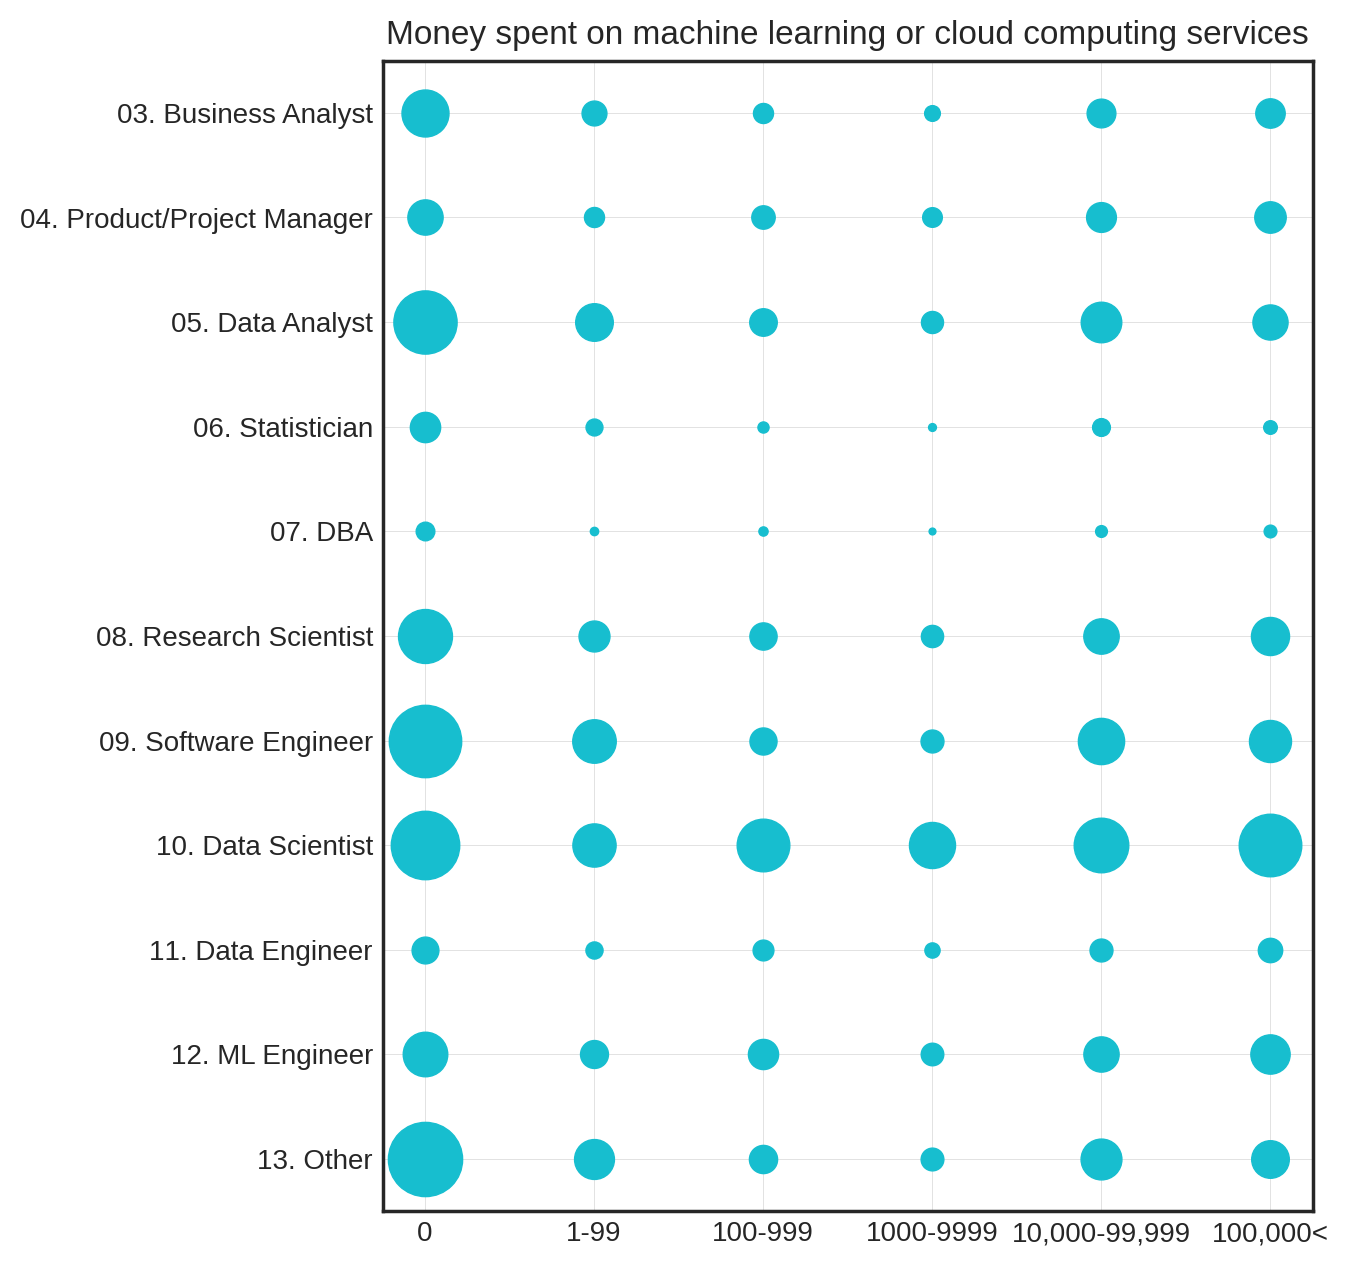

In [ ]:
cost = survey[['Q5','Q25','Q3']].groupby(['Q5','Q25']).count().reset_index().pivot('Q5','Q25','Q3')
cost.columns = ['0', '1-99', '100-999', '1000-9999','10,000-99,999','100,000<']

fig = plt.figure(figsize=(6, 13), dpi=200)

gs = fig.add_gridspec(5, 4)

labels = ['0', '1-99', '100-999', '1000-9999','10,000-99,999','100,000<']

ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for cur in cost.index[::-1]:
    for bl in labels:
        val = cost.loc[cur, bl]
        ax_plot.scatter(bl, cur, s=val, color='#17becf')
        
ax_plot.grid(linewidth=0.2, zorder=0)

plt.title('Money spent on machine learning or cloud computing services', size=12)

As you can see from the plot, the most people don't spend much money to learn to work on data. The most people spent less than $100 in the last 5 years. Although the question asked about how much money people spent at work and home on machine learning or cloud services, this question was the closest to the meaning that I could use to make this point.

There are many great and free resources to study coding and machine learning concepts. Some people pursue professional degree or certifications to validate their knowledge, but that doesn't mean that everyone has to have a data degree to become a Data Scientist.

### Now, let's see what sources that people use to learn data science.

## Which sources to use and study about data science (Q37)

In [ ]:
source = survey[['Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5',
       'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10']]\
.count(axis=0).reset_index().rename({'index':'source',0:'Number of people'}, axis=1)
source
sid={'Q37_Part_1':'Coursera', 'Q37_Part_2':'EdX', 'Q37_Part_3':'Kaggle Courses', 'Q37_Part_4':'DataCamp', 'Q37_Part_5':'Fast.ai',
'Q37_Part_6':'Udacity', 'Q37_Part_7':'Udemy', 'Q37_Part_8':'Linkedin Learn', 'Q37_Part_9':'Cloud Certification programs', 'Q37_Part_10':'University course'}
source['source'] = [sid[i] for i in source['source']]

fig = go.Figure()

fig.add_trace(go.Bar(x=source['source'],y=source['Number of people']))
fig.update_traces(marker_color='#17becf', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title="Sources to learn data science", width=800, height=500)
fig.show()

`Coursera`, `Kaggle Courses`, `Udemy` and `DataCamp` are the platforms that people use to study data science. `University courses` or `University Degrees` are also another popular way to gain knowledge about data science.

## Conclusion

If you're looking to change your career path to data science or want to pursue data science but don't know where to start and who to become, I hope that this analysis helped you to shed little light to the direction. The survey didn't ask about the how the respondents started with data, but I think it offered enough information give some pointers to those who aspire to become data scientists. Although it feels overwhelming at times, once you start learning, it's fun to work on data.

Thank you for taking the time to read my analysis.

The end of the notebook